In [1]:
using CSV, DataFrames, Statistics
using PyPlot # plotting library
using PyCall
using Printf
using FStrings
using LaTeXStrings # for L"$x$" to work instead of needing to do "\$x\$"

# check out all of the styles! https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
PyPlot.matplotlib.style.use("seaborn-pastel")

# change settings for all plots at once, e.g. font size
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["font.size"] = 16

#make jupyter notebook print more dataframe columns
ENV["COLUMNS"]=160
hand = "2v2"

print("Ready to go!")

Ready to go!

-----

# Reading in the Data
Now reading in the metrics data for 2v2.

In [2]:
df_2v2 = CSV.read("results/2v2_metrics.csv", DataFrame, copycols=true)
first(df_2v2, 23)

,trial,arc_len,area_btwn,max_a_loc,max_a_reg,max_err,mvt_eff,r_fd,t_fd
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,sub1_2v2_a_n_1,0.748291,0.0168483,0.9,0.0025875,0.0235,0.485956,4.9329,0.0235679
2,sub1_2v2_a_n_2,0.697183,0.018311,0.91,0.00233626,0.02,0.514335,5.2424,0.0207902
3,sub1_2v2_a_n_3,0.716414,0.0164827,0.9,0.00339716,0.0088,0.521678,5.6809,0.030014
4,sub1_2v2_a_n_4,0.628966,0.0186099,0.9,0.0035062,0.0094,0.618299,3.7641,0.0496735
5,sub1_2v2_a_n_5,0.769194,0.024214,0.9,0.00267586,0.0359,0.499014,5.7344,0.035901
6,sub2_2v2_a_n_1,0.554563,0.00733035,0.9,0.00161067,0.0135,0.564645,5.7871,0.0151927
7,sub2_2v2_a_n_2,1.10401,0.0369604,0.91,0.00244743,0.0324,0.210435,5.4755,0.134735
8,sub2_2v2_a_n_3,0.998397,0.0371125,0.91,0.00216985,0.0224,0.263048,5.2678,0.0794814
9,sub2_2v2_a_n_4,0.593701,0.00985501,0.9,0.00206752,0.0329,0.544436,4.256,0.0402962


In [3]:
subject_nums = []
translations = []
numbers = []

for row in eachrow(df_2v2)
    x = row[:trial]
    push!(subject_nums, x[4])
    push!(translations, x[10])
    push!(numbers, x[14])
end

s = convert(Array{Char,1}, subject_nums)
d = convert(Array{Char,1}, translations)
n = convert(Array{Char,1}, numbers)

insertcols!(df_2v2, 2, :subj=>s)
insertcols!(df_2v2, 3, :dir=>d)
insertcols!(df_2v2, 4, :num=>n)
first(df_2v2, 17)

,trial,subj,dir,num,arc_len,area_btwn,max_a_loc,max_a_reg,max_err,mvt_eff,r_fd,t_fd
,String,Char,Char,Char,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,sub1_2v2_a_n_1,1,a,1,0.748291,0.0168483,0.9,0.0025875,0.0235,0.485956,4.9329,0.0235679
2,sub1_2v2_a_n_2,1,a,2,0.697183,0.018311,0.91,0.00233626,0.02,0.514335,5.2424,0.0207902
3,sub1_2v2_a_n_3,1,a,3,0.716414,0.0164827,0.9,0.00339716,0.0088,0.521678,5.6809,0.030014
4,sub1_2v2_a_n_4,1,a,4,0.628966,0.0186099,0.9,0.0035062,0.0094,0.618299,3.7641,0.0496735
5,sub1_2v2_a_n_5,1,a,5,0.769194,0.024214,0.9,0.00267586,0.0359,0.499014,5.7344,0.035901
6,sub2_2v2_a_n_1,2,a,1,0.554563,0.00733035,0.9,0.00161067,0.0135,0.564645,5.7871,0.0151927
7,sub2_2v2_a_n_2,2,a,2,1.10401,0.0369604,0.91,0.00244743,0.0324,0.210435,5.4755,0.134735
8,sub2_2v2_a_n_3,2,a,3,0.998397,0.0371125,0.91,0.00216985,0.0224,0.263048,5.2678,0.0794814
9,sub2_2v2_a_n_4,2,a,4,0.593701,0.00985501,0.9,0.00206752,0.0329,0.544436,4.256,0.0402962


## Asterisk Plot

![Avg Asterisk](./pics/avgd_2v2_3subs_n.jpg)

-----

# Histograms of Metrics
Now I will produce histogram plots of the metrics to see what kind of a distribution we get for all the trials.
Shamelessly taken from my previous datascience course at: [link](https://github.com/SimonEnsemble/data_science_course)

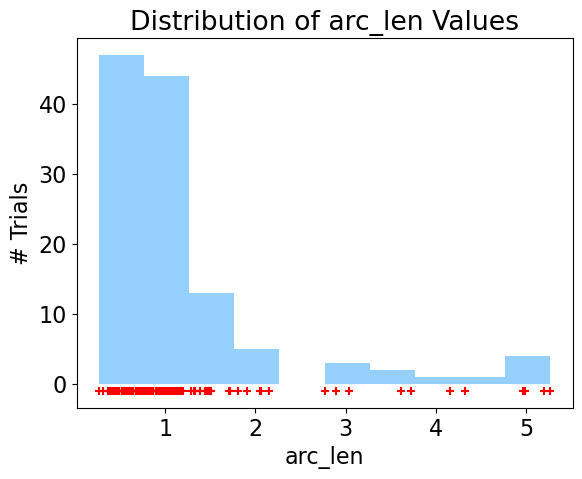

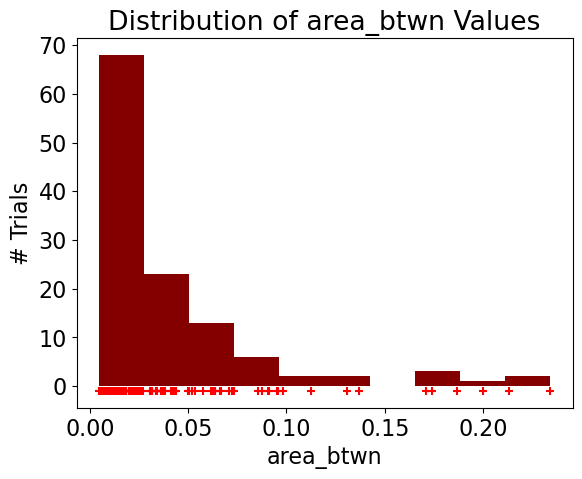

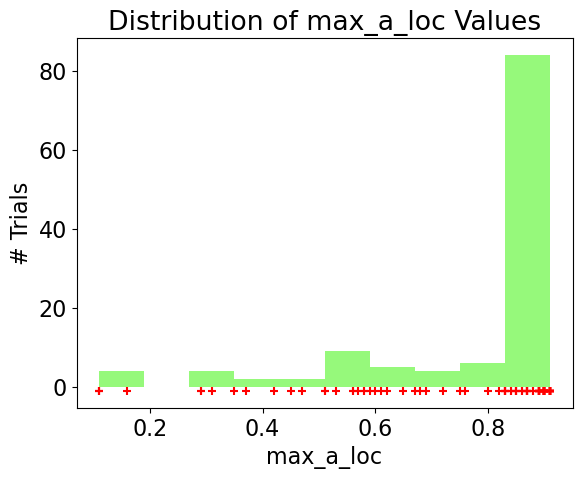

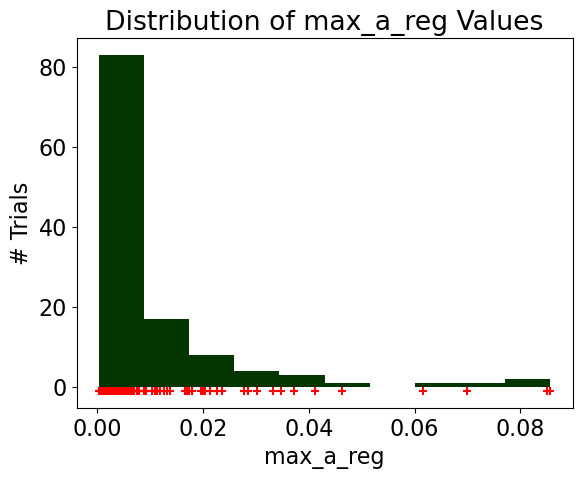

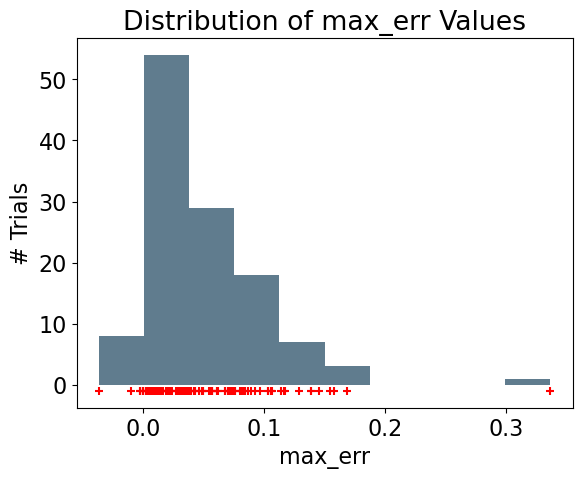

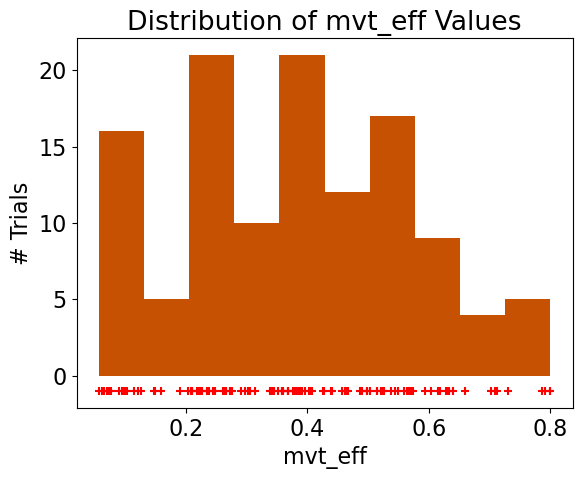

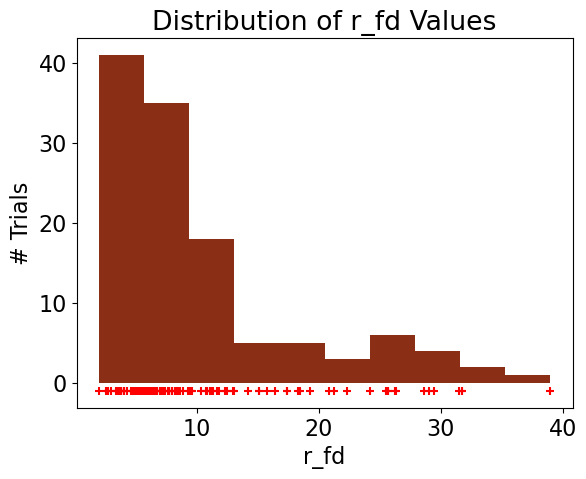

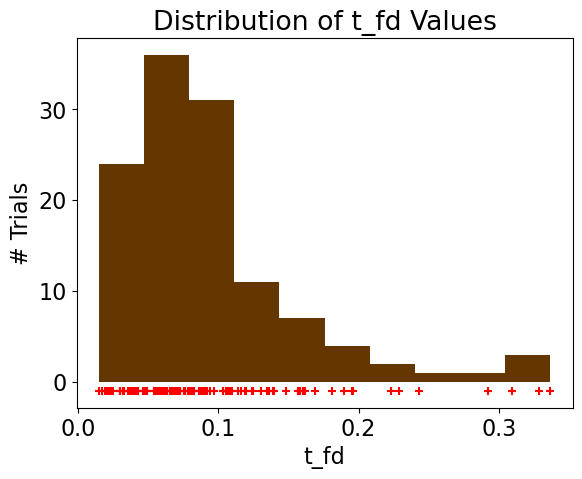

In [4]:
metrics = [:arc_len, :area_btwn, :max_a_loc, :max_a_reg, :max_err, :mvt_eff, :r_fd, :t_fd]

plot_colors = ["xkcd:light blue", "xkcd:dark red", "xkcd:light green", "xkcd:dark green",
               "xkcd:blue grey", "xkcd:dark orange", "xkcd:red brown", "xkcd:brown"]

i = 1
for m in metrics
    figure()
    hist(df_2v2[:, m], color=plot_colors[i]) #, normed=true)
    scatter(df_2v2[:, m], [-1 for i = 1:nrow(df_2v2)], marker="+", color="r")
    xlabel(f"{m}")
    ylabel("# Trials")
    title(f"Distribution of {m} Values")
    i = i + 1
end

### Observations of Histogram Plots
Based on what I see, here are the observations per metric (in order of appearance top to down):
* **arc length**: mostly concentrated at low arc lengths
* **max area region location**: mostly, the region of max error area is most commonly found at the end
* **max area region**: at the locations of max error area, the area of error (aka the area between the path and the target line) is still relatively low
* **max error**: values are distributed
* **movement efficiency**: values are distributed
* **rotational frechet distance**: aka max rotation error. Mostly low, but larger distribution at the low end
* translational frechet distance: all values are very low

----

# Metric Values by direction
Plot all metric values in bar charts by direction

In [5]:
subjects = ["sub1", "sub2", "sub3"]
translations = ["a", "b", "c", "d", "e", "f", "g", "h"]
rotations = ["n"]

function get_trial_vals(df::DataFrame, metric::Symbol, translation::String)
    hand = "2v2"
    subjects = ["sub1", "sub2", "sub3"]
    numbers = ["1", "2", "3", "4", "5"]
    
    values = []
    names = []
    
    for s in subjects
        for n in numbers
            trial_name = f"{s}_{hand}_{translation}_n_{n}"
            plot_name = f"{s}_{n}"
            row = df[df[!, :trial] .== trial_name, :]
            val = row[!, metric][1]
            
            push!(values, val)
            push!(names, plot_name)
        end
    end
    v = convert(Array{Float64,1}, values)
    #print(v)
    
    return v, names
end


function plt_metric_and_directions(m::Symbol, c::String="nothing")
    
    for t in translations
        figure()
        plt_title = f"{hand}: {m} - {t}_n"
        values, names = get_trial_vals(df_2v2, m, t)

        if c == "nothing"
            bar(names, values)
        else
            bar(names, values, color=c)
        end
        xticks(rotation=-45, ha="left")
        title(plt_title)
    end
end

print("Functions are ready!")

Functions are ready!

### Arc Length


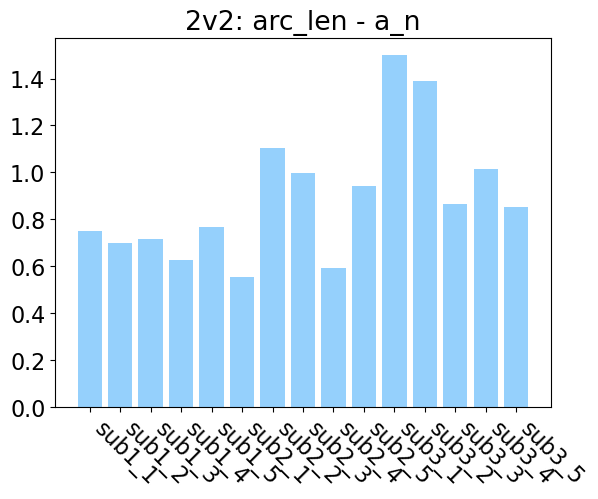

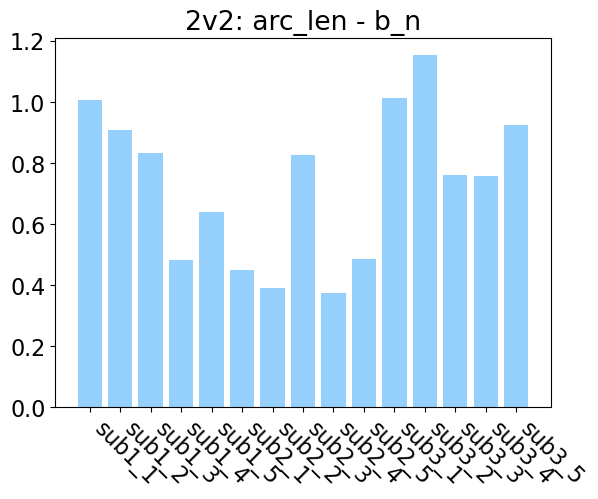

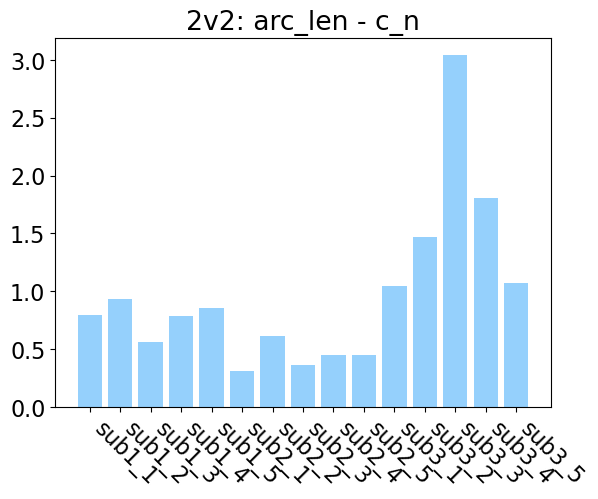

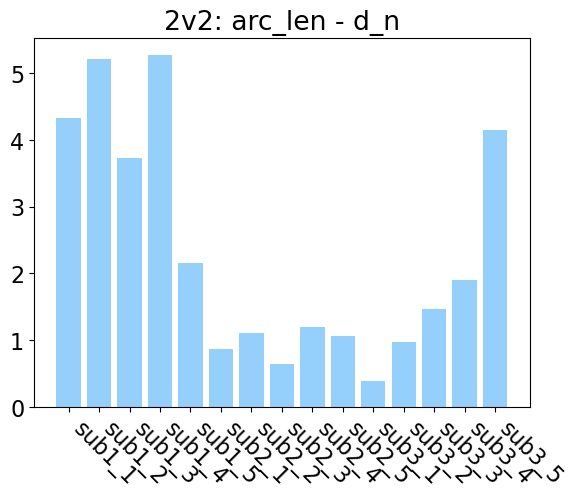

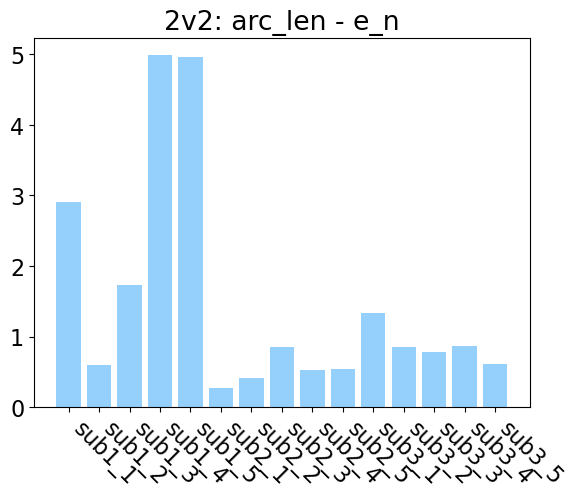

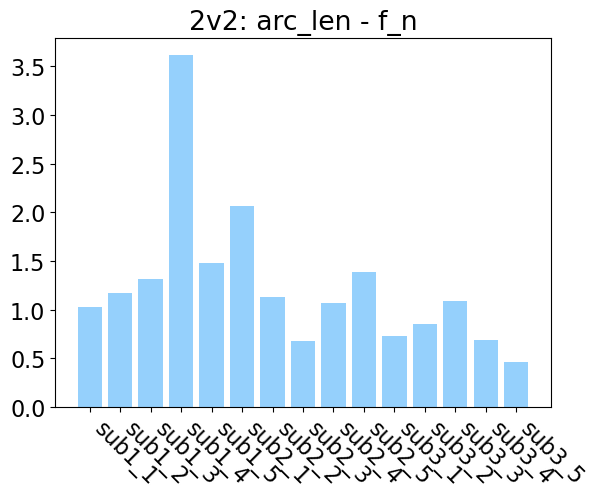

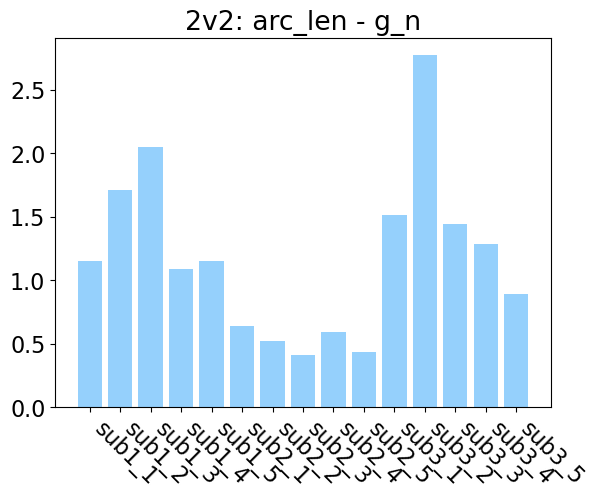

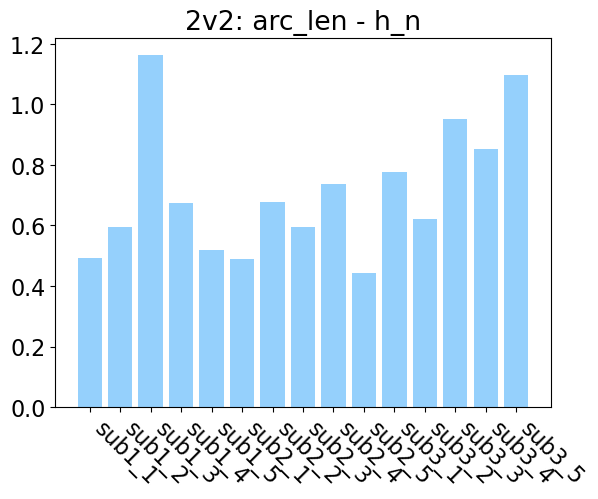

In [6]:
plt_metric_and_directions(:arc_len, "xkcd:light blue")

### area_btwn

metrics = [:arc_len, :area_btwn, :max_a_loc, :max_a_reg, :max_err, :mvt_eff, :r_fd, :t_fd]

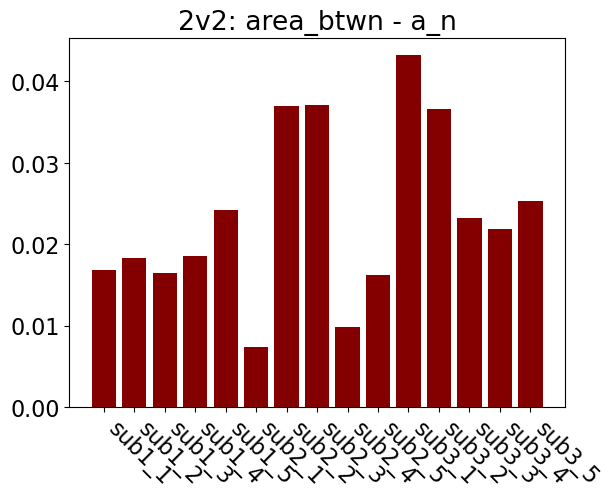

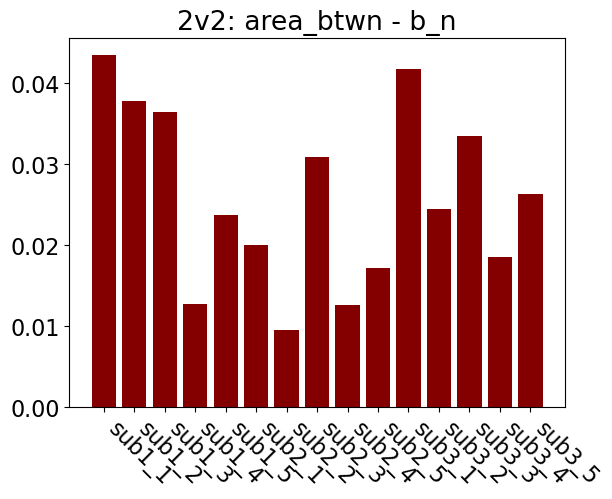

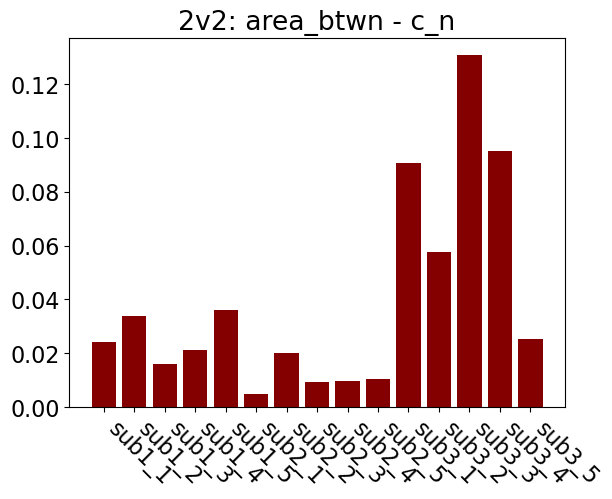

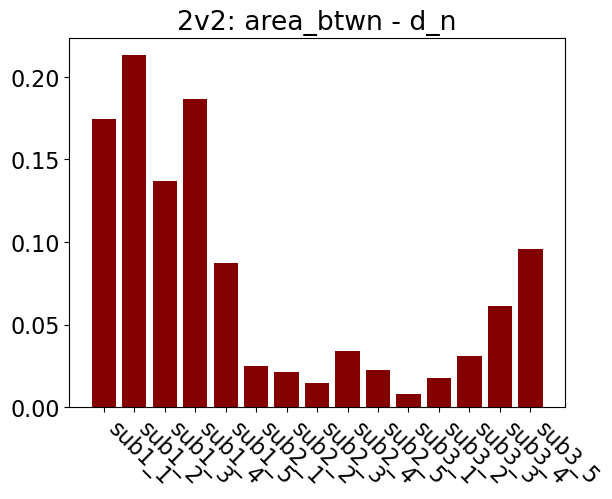

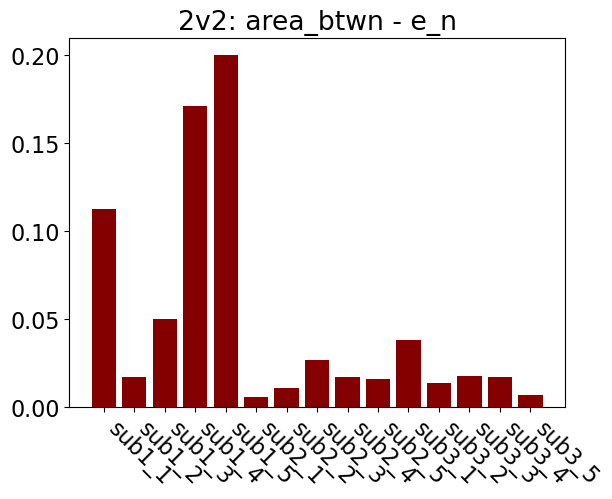

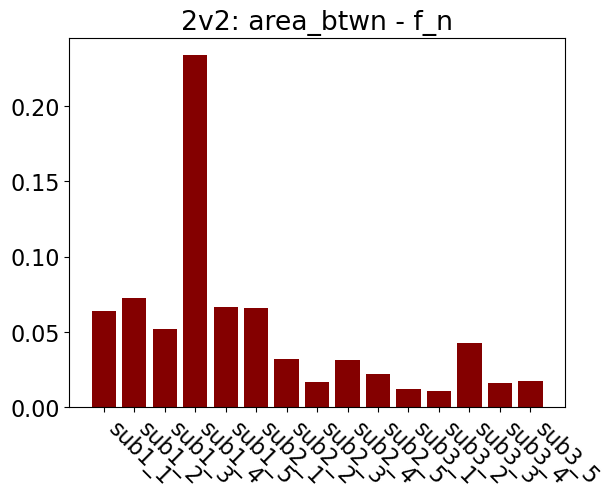

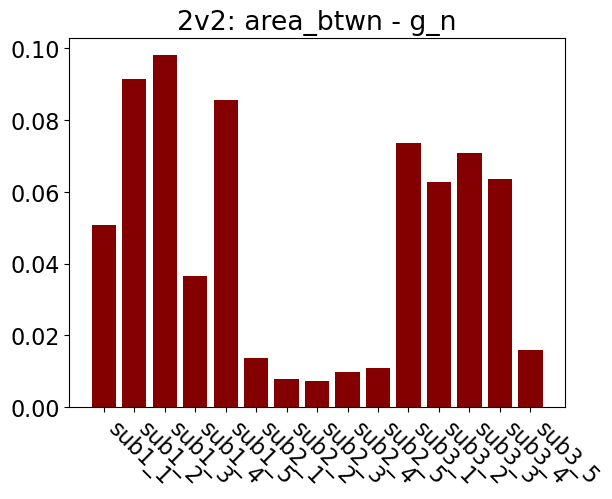

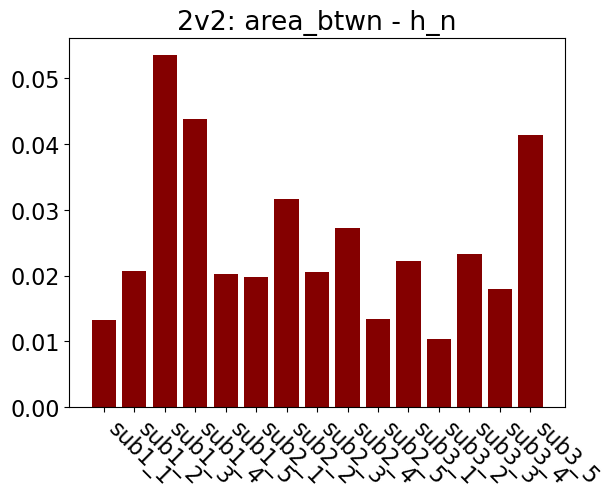

In [7]:
plt_metric_and_directions(:area_btwn, "xkcd:dark red")

### Max error


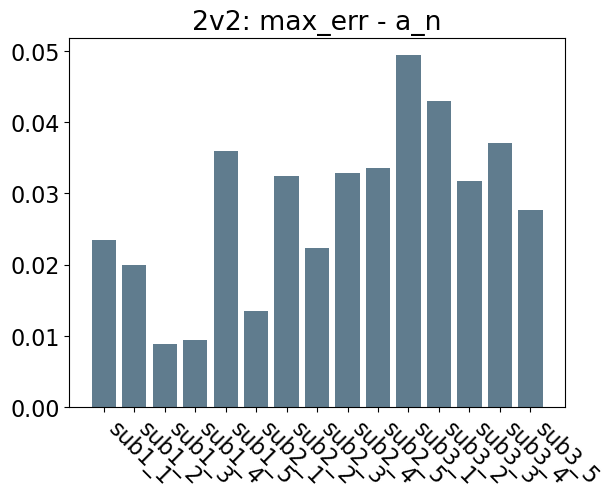

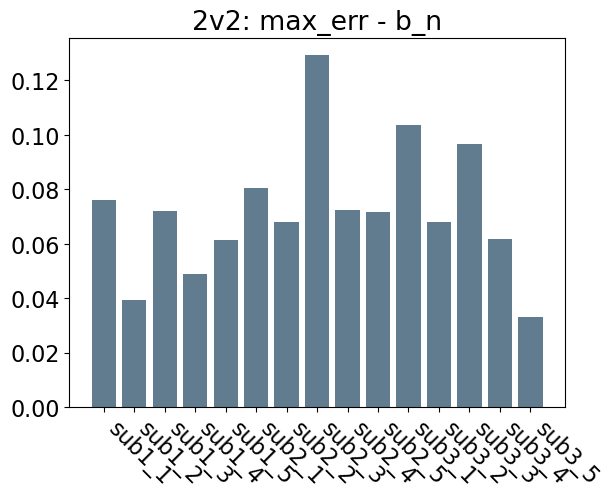

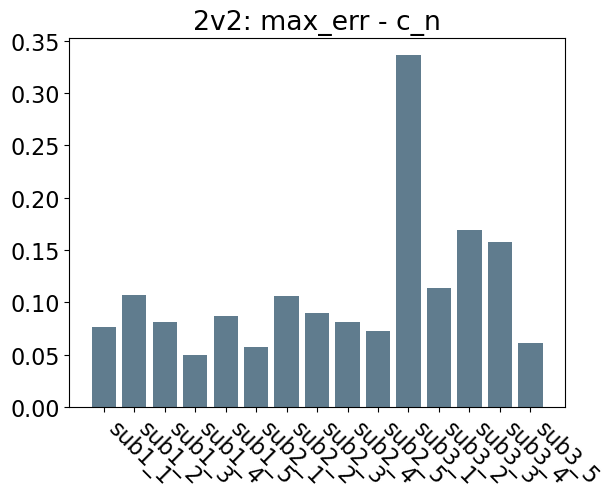

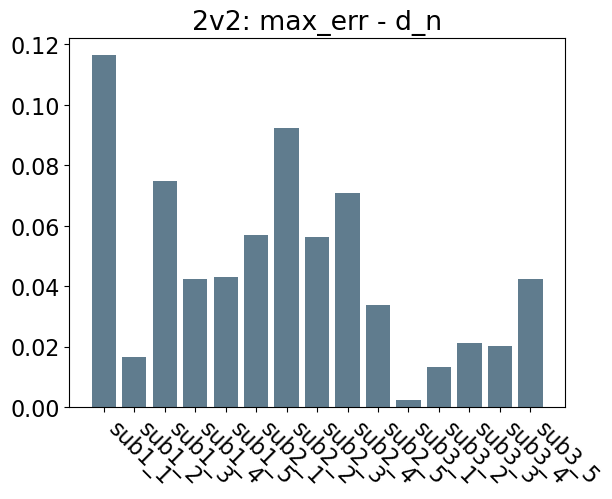

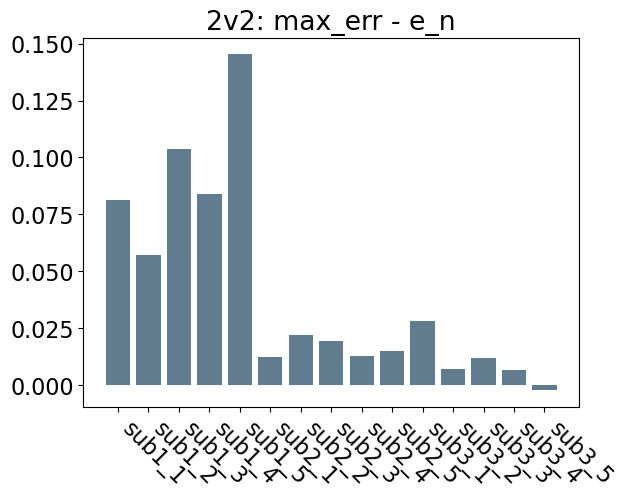

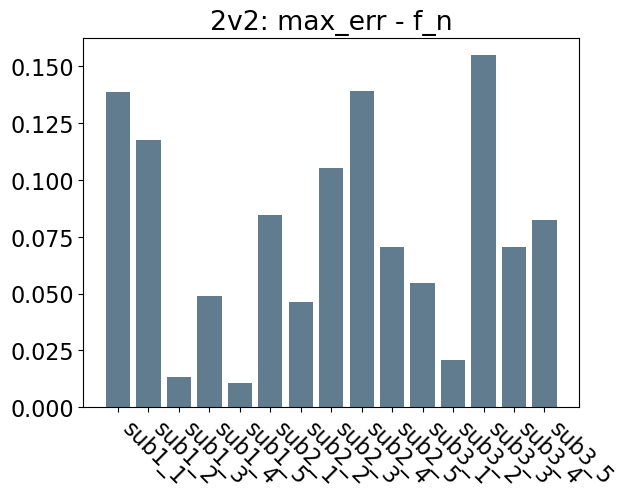

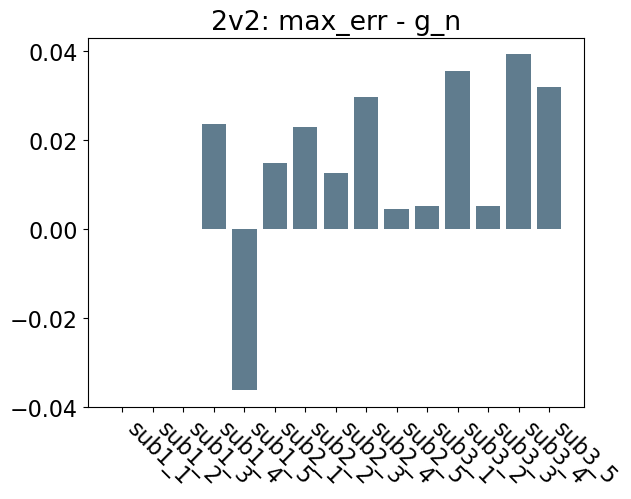

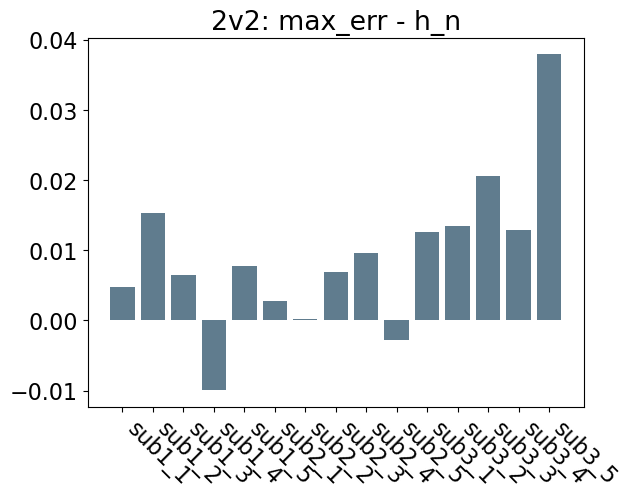

In [8]:
plt_metric_and_directions(:max_err, "xkcd:blue grey")

### Movement Efficiency

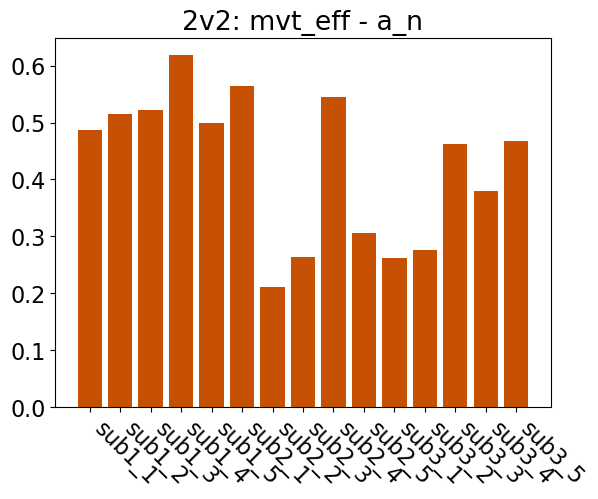

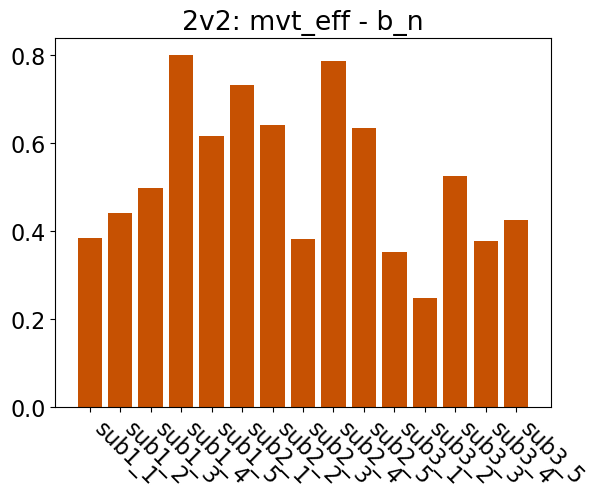

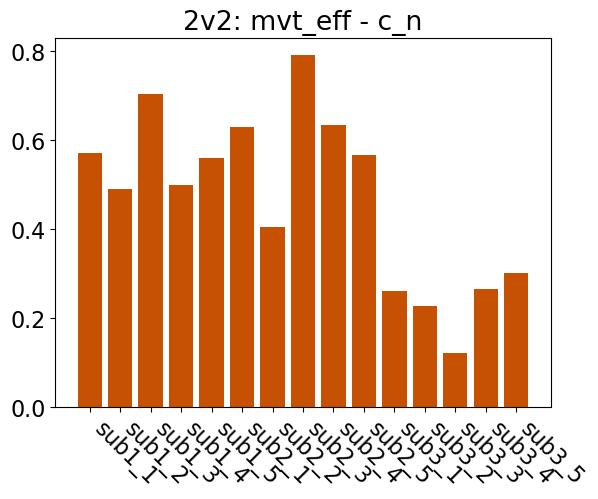

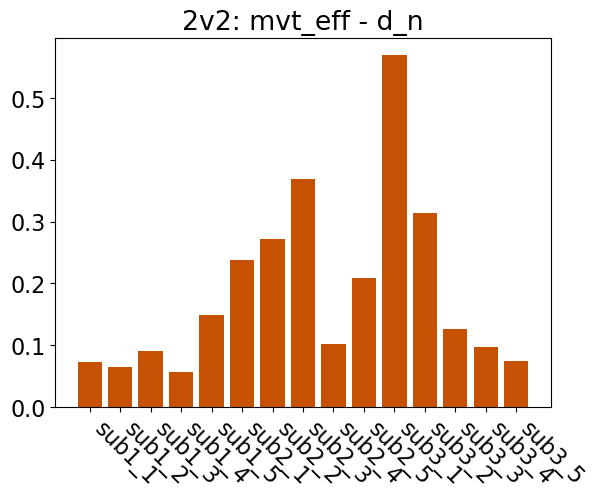

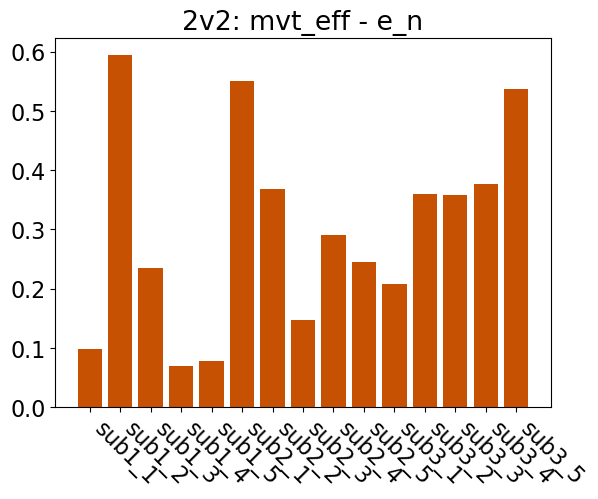

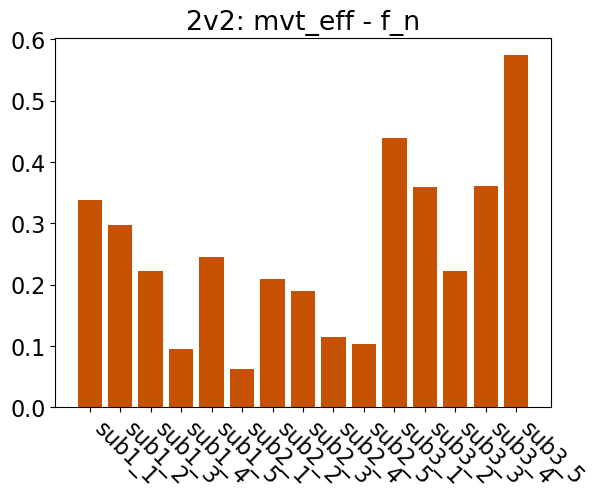

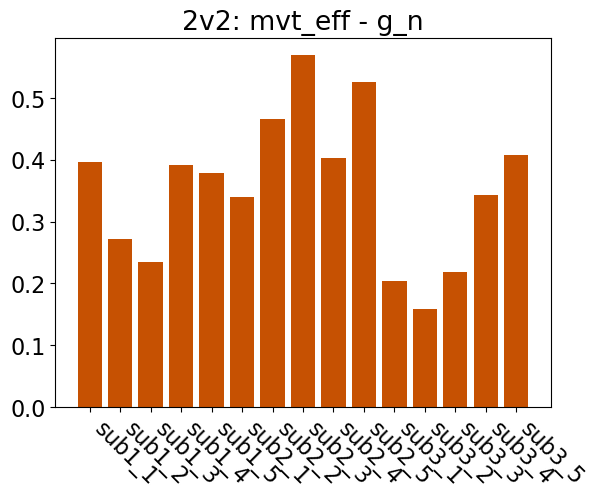

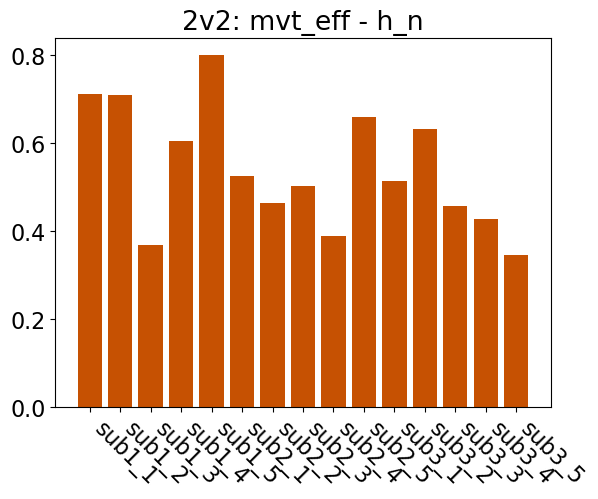

In [9]:
plt_metric_and_directions(:mvt_eff, "xkcd:dark orange")

### Max Area Region

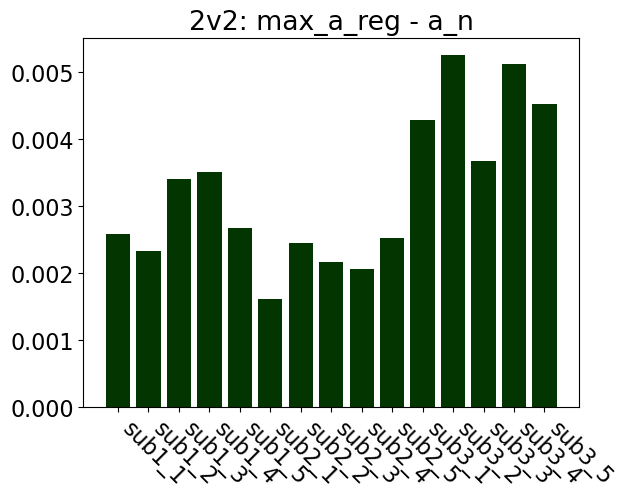

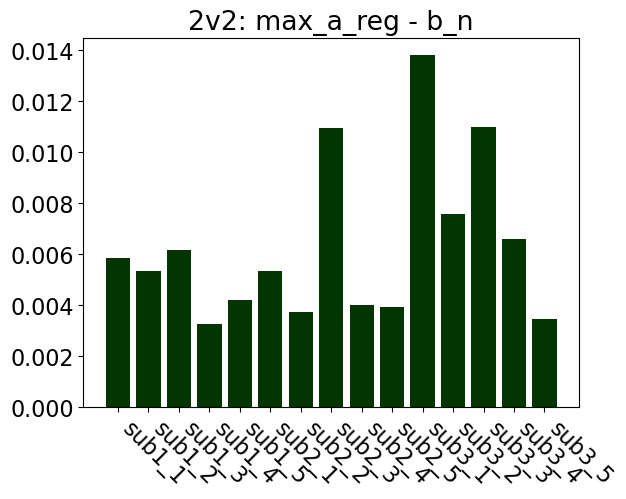

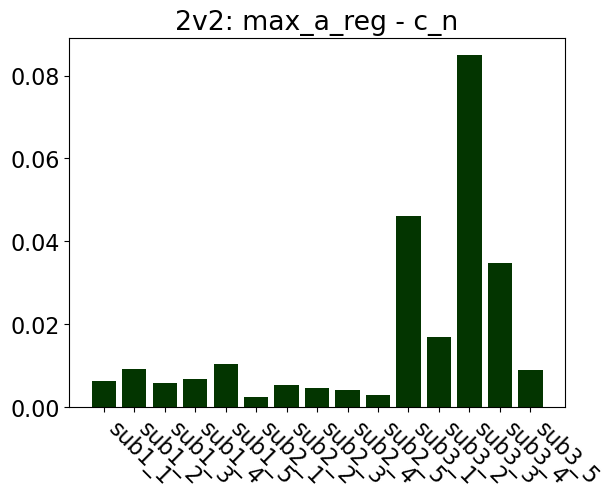

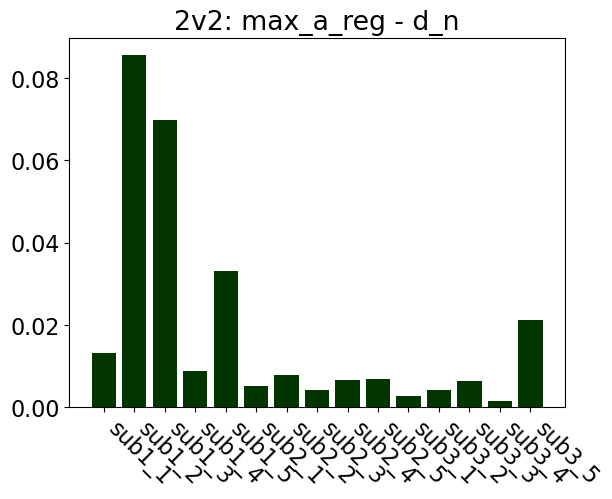

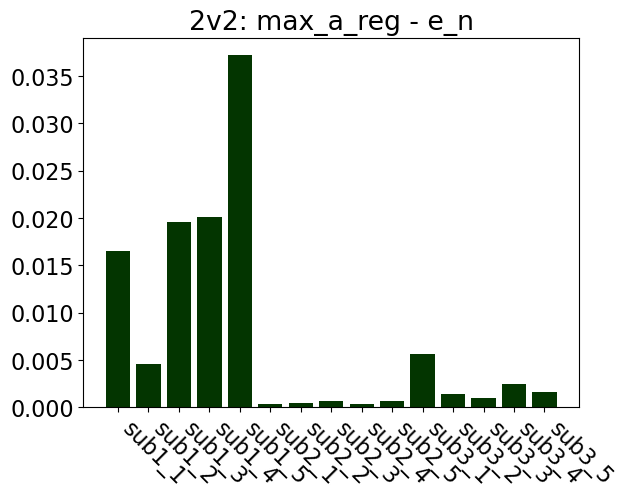

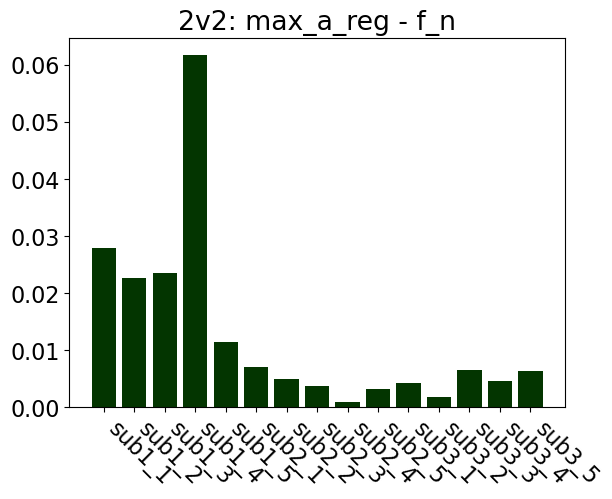

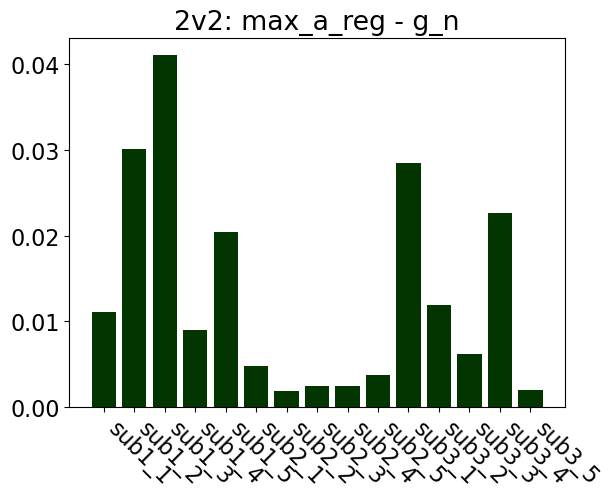

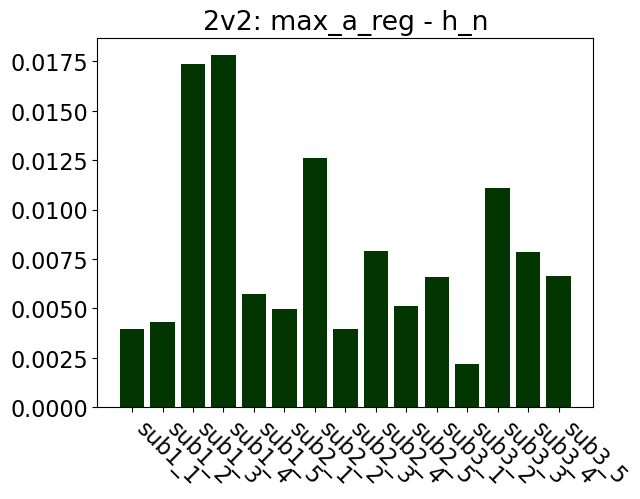

In [10]:
plt_metric_and_directions(:max_a_reg, "xkcd:dark green")

### Max Area Region Location

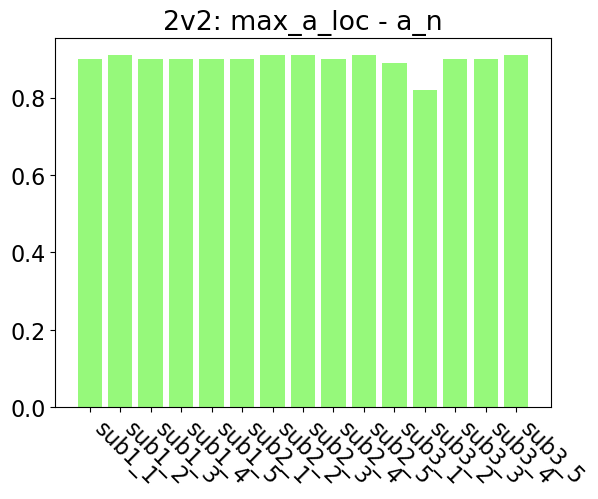

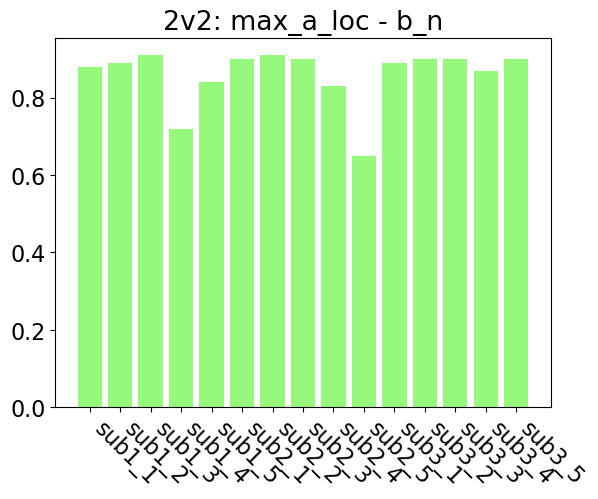

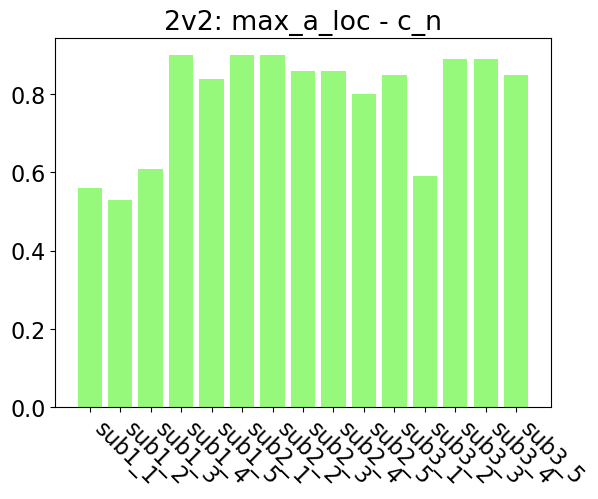

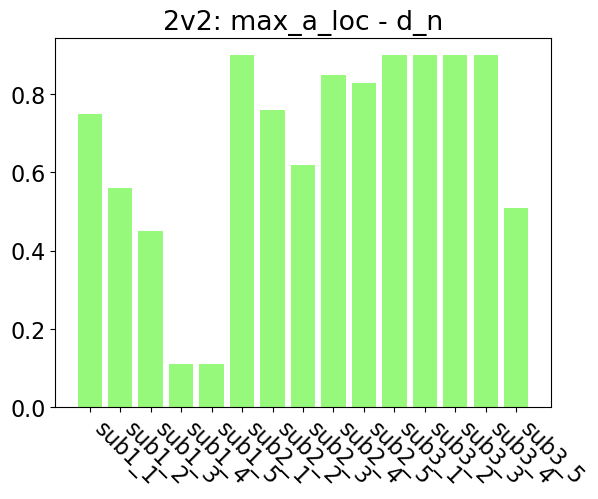

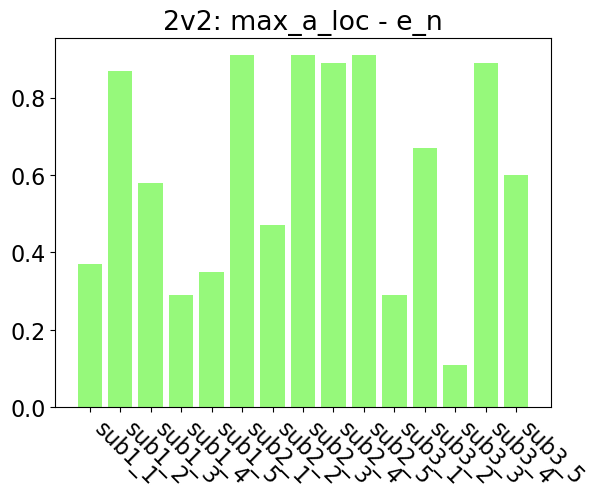

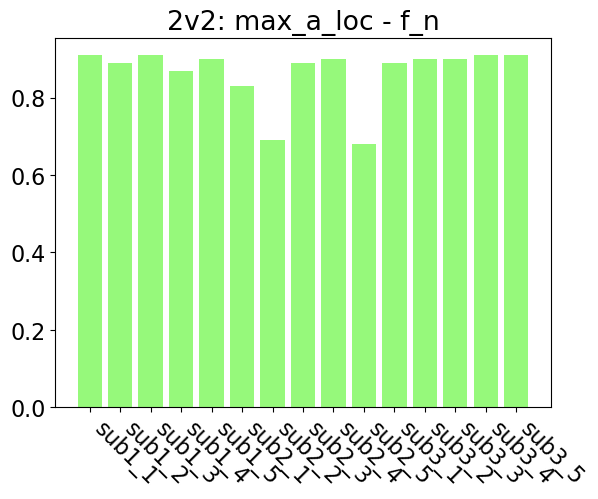

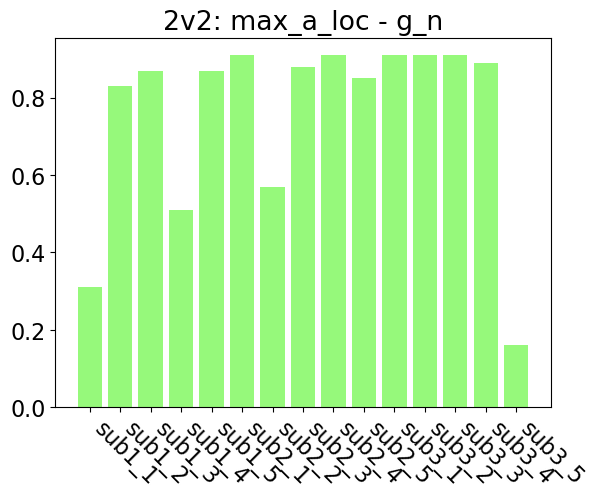

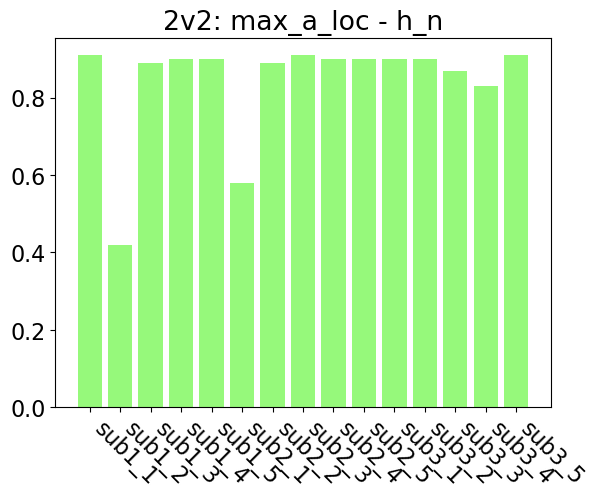

In [11]:
plt_metric_and_directions(:max_a_loc, "xkcd:light green")

### Translational Frechet Distance

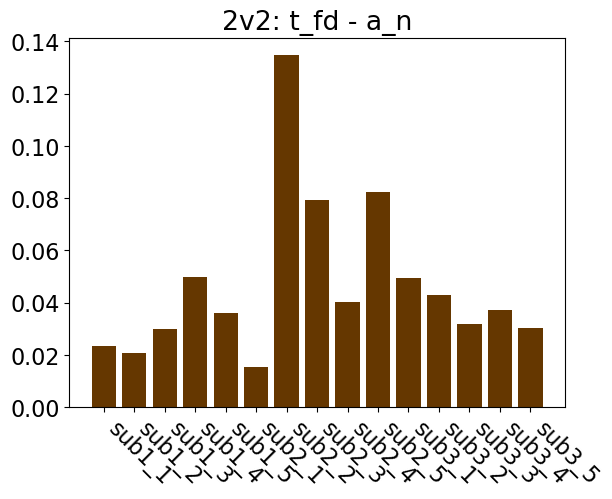

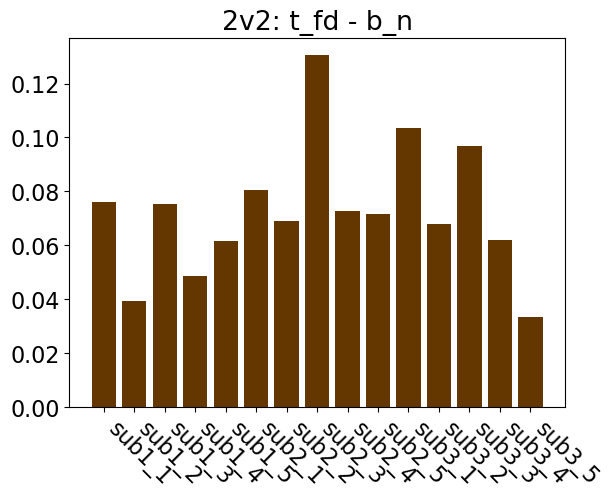

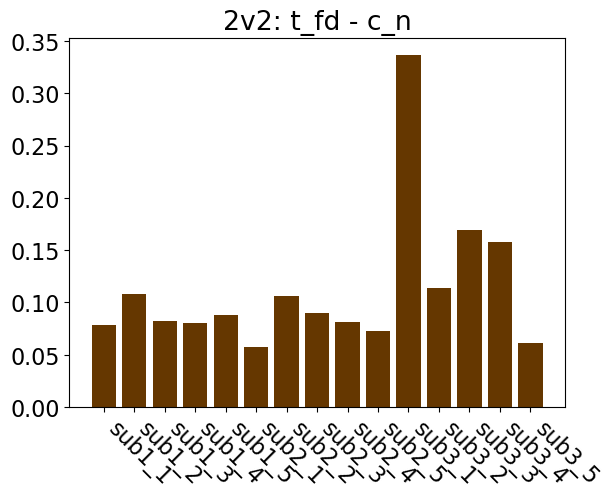

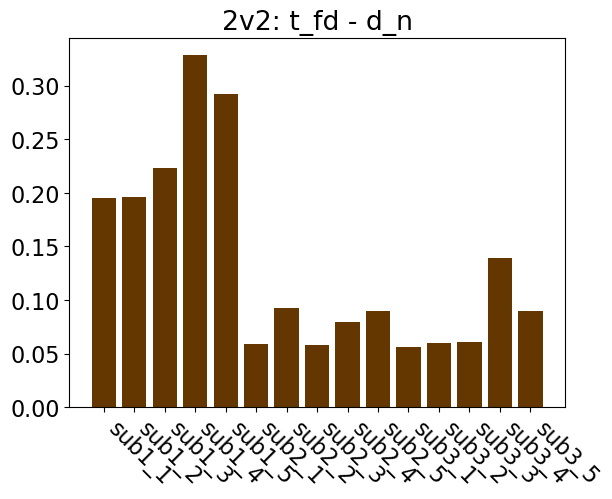

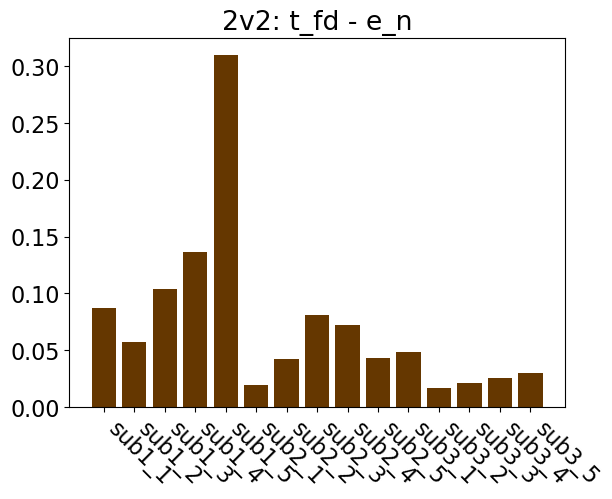

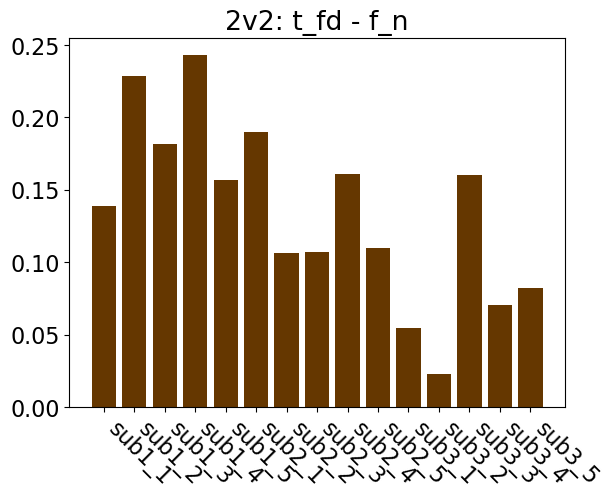

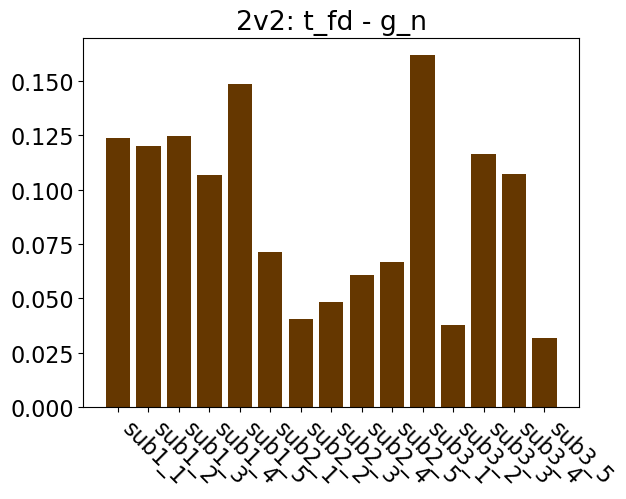

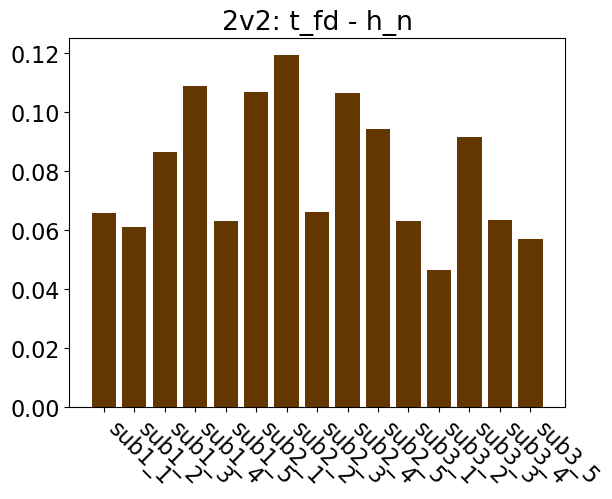

In [12]:
plt_metric_and_directions(:t_fd, "xkcd:brown")

### Rotational Frechet Distance

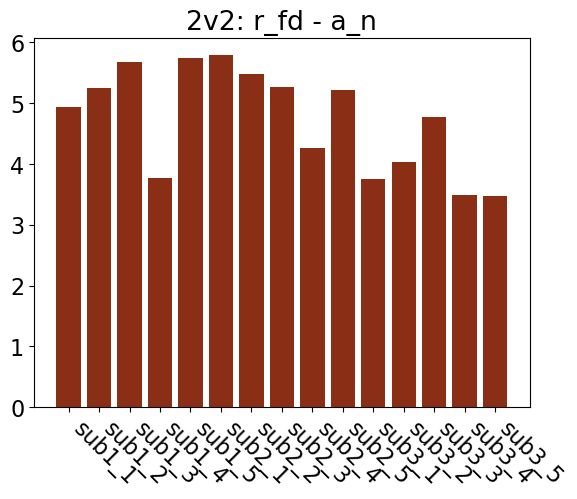

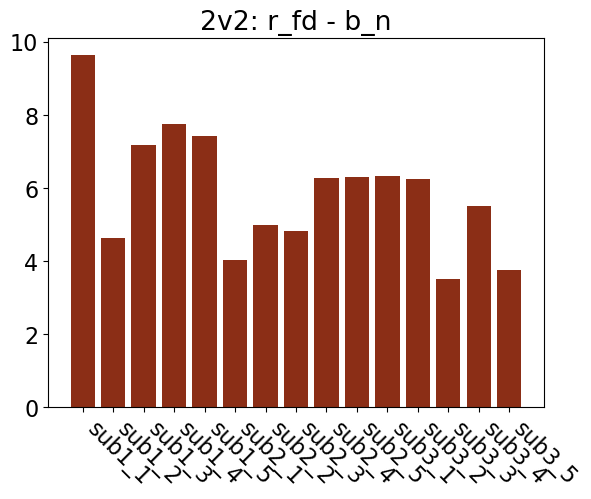

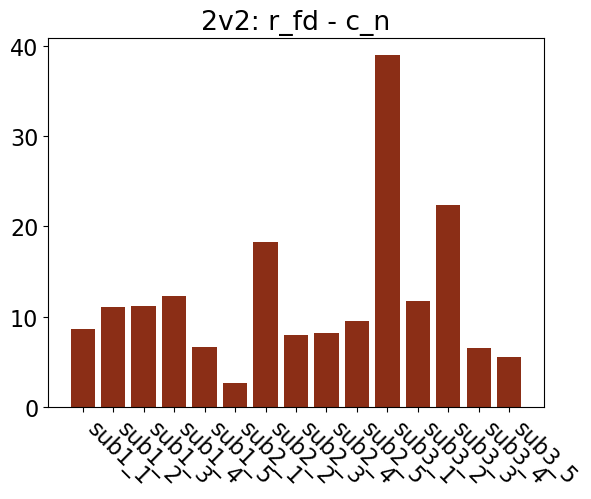

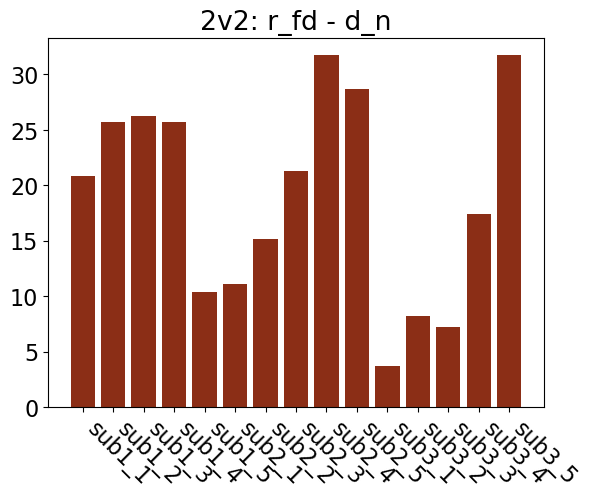

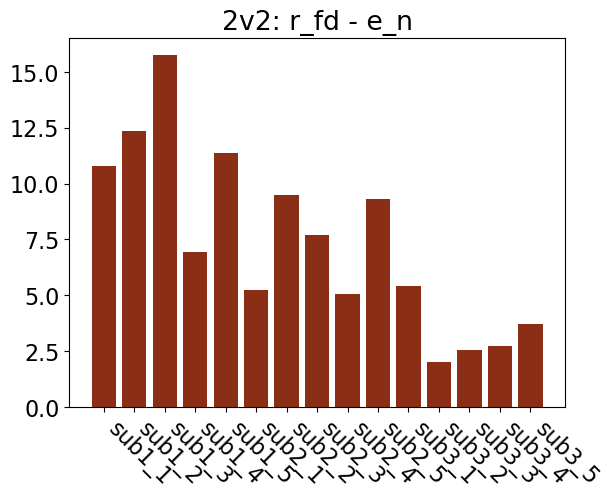

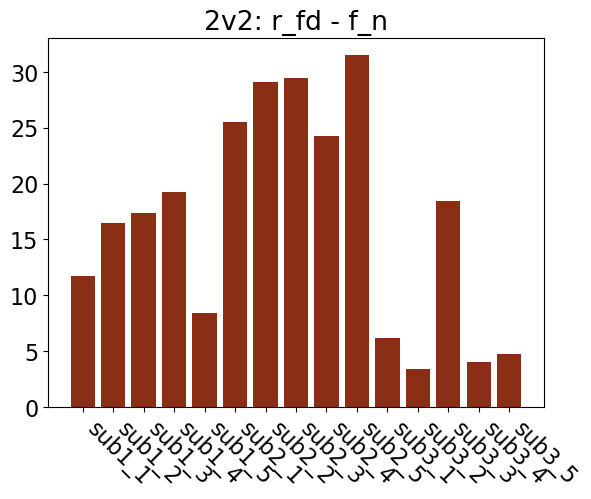

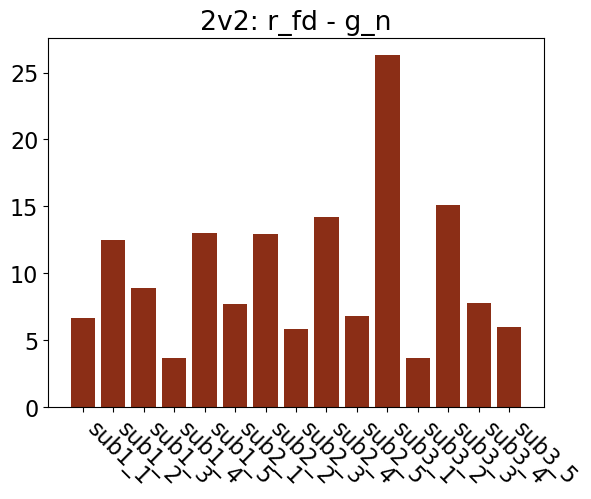

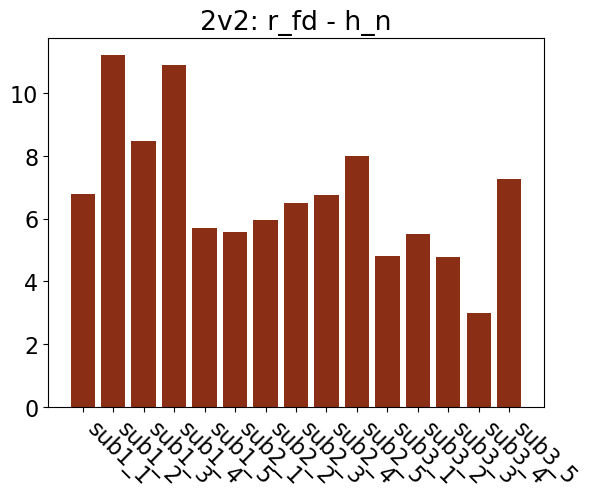

In [13]:
plt_metric_and_directions(:r_fd, "xkcd:red brown")

## Observations
Here is what I see based on the above plots.

-----

# Average Line Calculations

#### Dir: A
![Average Debug Plot for direction A](./pics/avgdebug_2v2_3subs_a_n.jpg)

#### Dir: B
![Average Debug Plot for direction B](./pics/avgdebug_2v2_3subs_b_n.jpg)

#### Dir: C
![Average Debug Plot for direction C](./pics/avgdebug_2v2_3subs_c_n.jpg)

#### Dir: D
![Average Debug Plot for direction D](./pics/avgdebug_2v2_3subs_d_n.jpg)

#### Dir: E
![Average Debug Plot for direction E](./pics/avgdebug_2v2_3subs_e_n.jpg)

#### Dir: F
![Average Debug Plot for direction F](./pics/avgdebug_2v2_3subs_f_n.jpg)

#### Dir: G
![Average Debug Plot for direction G](./pics/avgdebug_2v2_3subs_g_n.jpg)

#### Dir: H
![Average Debug Plot for direction H](./pics/avgdebug_2v2_3subs_h_n.jpg)


----

# T Tests for Symmetry

In [14]:
using HypothesisTests
# find average p-value between each trial in each direction. To get a baseline pvalue to base it on
metric = :arc_len


function analyze_pvals(m::Symbol)
    translations = ["a", "b", "c", "d", "e", "f", "g", "h"]
    pvalues = []

    for t in translations
        # get values of trials with the same direction
        vv, _ = get_trial_vals(df_2v2, m, t)
        #v = convert(Array{Float64,1}, vals)

        # calculate pvalue for the set
        p_val = pvalue(OneSampleTTest(vv))

        # put pvalue into a list of pvalues
        # calculate average and std
        # print it all out
        push!(pvalues, p_val)
    end
    
    println(pvalues)

    avg_pval = mean(pvalues)
    std_pval = std(pvalues)
    
    println("  ")
    println(f"average: {avg_pval}, std: {std_pval}")
    return avg_pval, std_pval, pvalues
end

analyze_pvals(metric)

Any[5.589263358639225e-9, 1.907842694733091e-8, 0.0001056109956276204, 0.00015286333259349242, 0.002517807352362848, 1.7833360153967732e-5, 7.200448478478844e-6, 5.2795364749119366e-9]
  
average: 0.0003501681795553986, std: 0.000877765229618628


(0.0003501681795553986, 0.000877765229618628, Any[5.589263358639225e-9, 1.907842694733091e-8, 0.0001056109956276204, 0.00015286333259349242, 0.002517807352362848, 1.7833360153967732e-5, 7.200448478478844e-6, 5.2795364749119366e-9])

In [36]:
function compare_2_directions(metric::Symbol)
    translations = ["a", "b", "c", "d", "e", "f", "g", "h"]
    results_report = zeros(8, 8)
    
    for t in translations
        i = findall(x->x==t, translations)[1]
        n = 0
        
        for t2 in translations[i:end]
            v1, _ = get_trial_vals(df_2v2, metric, t)
            v2, _ = get_trial_vals(df_2v2, metric, t2)
            
            #v1 = convert(Array{Float64,1}, vals1)
            #v2 = convert(Array{Float64,1}, vals2)
            
            result = pvalue(OneSampleTTest(v1, v2))
            r = round(result, digits=4)
            results_report[i, i+n] = r
            
            # println(f" For {t} v {t2}: {r}")
            n = n+1
        end
        println(" ")
    end
    
    r_df = DataFrame(trials=translations = ["a", "b", "c", "d", "e", "f", "g", "h"], 
                     a=results_report[1,:], b=results_report[2,:], c=results_report[3,:],
                     d=results_report[4,:], e=results_report[5,:], f=results_report[6,:],
                     g=results_report[7,:], h=results_report[8,:])
    
    return r_df
end

temp = compare_2_directions(:arc_len)

,trials,a,b,c,d,e,f,g,h
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,a,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,b,0.0346,NaN,0.0,0.0,0.0,0.0,0.0,0.0
3,c,0.6619,0.1851,NaN,0.0,0.0,0.0,0.0,0.0
4,d,0.0122,0.0032,0.0169,NaN,0.0,0.0,0.0,0.0
5,e,0.1892,0.0905,0.2817,0.0887,NaN,0.0,0.0,0.0
6,f,0.1558,0.0456,0.3584,0.0255,0.4981,NaN,0.0,0.0
7,g,0.0974,0.005,0.2941,0.0244,0.4832,0.7836,NaN,0.0
8,h,0.0649,0.7906,0.1465,0.0029,0.0869,0.0272,0.0128,NaN


In [16]:
for m in metrics
    maxes = []
    mins = []
    r = compare_2_directions(m)
    
    println(f"{m} data")
    println("   ")
    println(r)
    println("================================================")
    println("    ")
end

 
 
 
 
 
 
 
 
arc_len data
   
8×9 DataFrame
 Row │ trials  a         b         c         d         e         f         g         h       
     │ String  Float64   Float64   Float64   Float64   Float64   Float64   Float64   Float64 
─────┼───────────────────────────────────────────────────────────────────────────────────────
   1 │ a       NaN         0.0       0.0       0.0       0.0       0.0       0.0         0.0
   2 │ b         0.0346  NaN         0.0       0.0       0.0       0.0       0.0         0.0
   3 │ c         0.6619    0.1851  NaN         0.0       0.0       0.0       0.0         0.0
   4 │ d         0.0122    0.0032    0.0169  NaN         0.0       0.0       0.0         0.0
   5 │ e         0.1892    0.0905    0.2817    0.0887  NaN         0.0       0.0         0.0
   6 │ f         0.1558    0.0456    0.3584    0.0255    0.4981  NaN         0.0         0.0
   7 │ g         0.0974    0.005     0.2941    0.0244    0.4832    0.7836  NaN           0.0
   8 │ h         0.0

    
 
 
 
 
 
 
 
 
t_fd data
   
8×9 DataFrame
 Row │ trials  a         b         c         d         e         f         g        h       
     │ String  Float64   Float64   Float64   Float64   Float64   Float64   Float64  Float64 
─────┼──────────────────────────────────────────────────────────────────────────────────────
   1 │ a       NaN         0.0       0.0       0.0       0.0       0.0       0.0        0.0
   2 │ b         0.012   NaN         0.0       0.0       0.0       0.0       0.0        0.0
   3 │ c         0.0047    0.032   NaN         0.0       0.0       0.0       0.0        0.0
   4 │ d         0.0051    0.038     0.5118  NaN         0.0       0.0       0.0        0.0
   5 │ e         0.2408    0.9863    0.1911    0.0016  NaN         0.0       0.0        0.0
   6 │ f         0.0007    0.0057    0.4571    0.9809    0.0093  NaN         0.0        0.0
   7 │ g         0.0152    0.1521    0.1981    0.0486    0.3036    0.0207  NaN          0.0
   8 │ h         0.0009    0

![Avg Asterisk](./pics/avgd_2v2_3subs_n.jpg)

-----

In [26]:
a = [1, 2, 3]
b = ["a", "b", "c"]
c = zip(a,b)
for d in c
    print(d[1])
    print(" ")
    println(d[2])
end

1 a
2 b
3 c


In [59]:
groups = groupby(df_2v2, :dir)
a_df = groups[1]
println(a_df)
test = zeros(15, 8)
d = a_df[4, 4]
println(d)
test[5,1] = float(d)
test

15×12 SubDataFrame
 Row │ trial           subj  dir   num   arc_len   area_btwn   max_a_loc  max_a_reg   max_err  mvt_eff   r_fd     t_fd      
     │ String          Char  Char  Char  Float64   Float64     Float64    Float64     Float64  Float64   Float64  Float64   
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ sub1_2v2_a_n_1  1     a     1     0.748291  0.0168483        0.9   0.0025875    0.0235  0.485956   4.9329  0.0235679
   2 │ sub1_2v2_a_n_2  1     a     2     0.697183  0.018311         0.91  0.00233626   0.02    0.514335   5.2424  0.0207902
   3 │ sub1_2v2_a_n_3  1     a     3     0.716414  0.0164827        0.9   0.00339716   0.0088  0.521678   5.6809  0.030014
   4 │ sub1_2v2_a_n_4  1     a     4     0.628966  0.0186099        0.9   0.0035062    0.0094  0.618299   3.7641  0.0496735
   5 │ sub1_2v2_a_n_5  1     a     5     0.769194  0.024214         0.9   0.00267586   0.0359  0.499014   5.734

15×8 Array{Float64,2}:
  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 52.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [44]:
# get pvalues for the entire metric data, all together
# results_report = zeros(8, 8)

for row in eachrow(df_2v2)
    # println(row[5:end])
    # TODO: get 15x8 matrix for each data?
    metric_vals = [row[5], row[6], row[7], row[8], row[9], row[10], row[11], row[12]]
    #println(metric_vals)
end

groups = groupby(df_2v2, :dir)
a_df = groups[1]
b_df = groups[2]
c_df = groups[3]
d_df = groups[4]
e_df = groups[5]
f_df = groups[6]
g_df = groups[7]
h_df = groups[8]
directions = [a_df, b_df, c_df, d_df, e_df, f_df, g_df, h_df]

function full_comparison(directions_data)
    translations = ["a", "b", "c", "d", "e", "f", "g", "h"]
    results_report = zeros(8, 8)
    full = zip(translations, directions_data)
    
    for f in full
        t = f[1]
        d = f[2]
        i = findall(x->x==t, translations)[1]
        n = 0

        comp = zip(translations[i:end], directions_data[i:end])
        for c in comp
            t2 = c[1]
            d2 = c[2]
            v1 = zeros(15, 8)
            v2 = zeros(15, 8)

            for j in range(1, stop=15)
                for k in range(1, stop=8)
                    v1[j, k] = t[j, k]
                    v2[j, k] = t2[j,k]
                end
            end
            # arc_len	area_btwn	max_a_loc	max_a_reg	max_err	mvt_eff	r_fd	t_fd
#             v1 = [d[!, :arc_len], d[!, :area_btwn], d[!, :max_a_reg], d[!, :max_a_loc], d[!, :max_err], d[!, :mvt_eff], d[!, :t_fd]]
#             v2 = [d2[!, :arc_len], d2[!, :area_btwn], d2[!, :max_a_reg], d2[!, :max_a_loc], d2[!, :max_err], d2[!, :mvt_eff], d2[!, :t_fd]]
            #v1 = [d[!, 5], d[!, 6], d[!, 7], d[!, 8], d[!, 9], d[!, 10], d[!, 11], d[!, 12]]
            #v2 = [d2[!, 5], d2[!, 6], d2[!, 7], d2[!, 8], d2[!, 9], d2[!, 10], d2[!, 11], d2[!, 12]]
            
            #v1 = convert(Array{Float64,1}, vals1)
            #v2 = convert(Array{Float64,1}, vals2)
            println(v1)

            result = pvalue(OneSampleTTest(v1, v2))
            r = round(result, digits=4)
            results_report[i, i+n] = r

            # println(f" For {t} v {t2}: {r}")
            n = n+1
        end
        println(" ")

        r_df = DataFrame(trials=translations = ["a", "b", "c", "d", "e", "f", "g", "h"], 
                     a=results_report[1,:], b=results_report[2,:], c=results_report[3,:],
                     d=results_report[4,:], e=results_report[5,:], f=results_report[6,:],
                     g=results_report[7,:], h=results_report[8,:])

        return r_df
    end
end

# rr = DataFrame(dir=["a", "b", "c", "d", "e", "f", "g", "h"], a=)
full_comparison(directions)

LoadError: [91mMethodError: no method matching getindex(::String, ::Int64, ::Int64)[39m
[91m[0mClosest candidates are:[39m
[91m[0m  getindex(::String, ::Int64) at strings/string.jl:209[39m
[91m[0m  getindex(::AbstractString, ::Integer) at strings/basic.jl:182[39m
[91m[0m  getindex(::String, [91m::UnitRange{Int64}[39m) at strings/string.jl:244[39m
[91m[0m  ...[39m

![Avg Asterisk](./pics/avgd_2v2_3subs_n.jpg)

----

# Clustering for Symmetry

In [18]:
using Clustering

# use kmeans or hierarchical clustering single linkage?

In [19]:
test = [1, 2, 3, 4, 5]
t = 2
i = findall(x->x!=t, test)

4-element Array{Int64,1}:
 1
 3
 4
 5